# Basic AutoEncoders





```
                                       +---+                                          
                                       |   |    
                                       | C |   
                +----------------+     | O |         +-----------------+
          -->   |    Encoder     | --> | D |  -->    |     Decoder     | --> 
                +----------------+     | E |         +-----------------+
                                       |   |
                                       |   |   
                                       |   |
                                       +---+
```

In [18]:
import warnings

warnings.filterwarnings('ignore')

In [19]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [20]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

(5, <matplotlib.image.AxesImage at 0x7fe9d81fb760>)

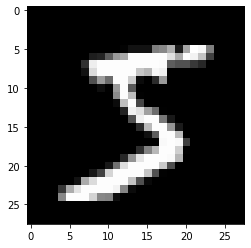

In [22]:
y_train[0], plt.imshow(X_train[0], cmap='gray')

In [23]:
X_train = X_train/255
X_test = X_test/255

## Architecture

In [34]:
INPUT_SHAPE = (28, 28, 1)

In [35]:
encoder_input = keras.layers.Input(shape=INPUT_SHAPE, name='input-layer')
flatten_layer = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(units=64, activation="relu", name='encoder')(flatten_layer)
hidden_layer2 = keras.layers.Dense(units=28*28, activation="relu", name='hidden-layer2')(encoder_output)
decoder_output = keras.layers.Reshape(target_shape=INPUT_SHAPE, name='decoder')(hidden_layer2)

In [36]:
encoder = keras.Model(inputs=encoder_input, outputs=encoder_output)
auto_encoder = keras.Model(inputs=encoder_input, outputs=decoder_output)

In [37]:
auto_encoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 encoder (Dense)             (None, 64)                50240     
                                                                 
 hidden-layer2 (Dense)       (None, 784)               50960     
                                                                 
 decoder (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [38]:
opt = keras.optimizers.Adam(learning_rate=0.001)

auto_encoder.compile(opt, loss='mse')

In [39]:
epochs=3

for epoch in range(epochs):

    history = auto_encoder.fit(
        X_train,
        X_train,
        epochs=1, 
        batch_size=32, validation_split=0.10)   

1688/1688 [==============================] - 9s 5ms/step - loss: 0.0105 - val_loss: 0.0104


In [40]:
def plot_ae_images(arr):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(arr, cmap='gray')
    ax[1].imshow(auto_encoder.predict(arr.reshape(-1, 28, 28, 1))[0], cmap='gray')
    plt.show()

1/1 [==============================] - 1s 888ms/step


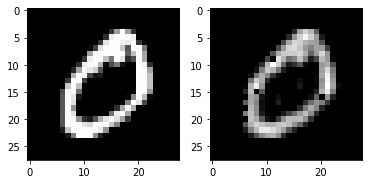

In [41]:
plot_ae_images(X_train[1])

1/1 [==============================] - 0s 46ms/step


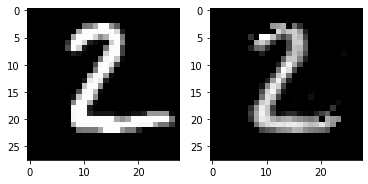

In [42]:
plot_ae_images(X_test[1])